In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU만 사용하도록 제한
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
        print(e)

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
pwd

'e:\\Pill Project\\code\\Model'

In [13]:
# 데이터셋 디렉터리 경로
dataset_dir = 'E:\\Pill Project\\half_data'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'valid')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 224
image_height = 224
num_classes = 400

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 207360 images belonging to 400 classes.
Found 25920 images belonging to 400 classes.
Found 25920 images belonging to 400 classes.


In [14]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [15]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(32, 224, 224, 3)

In [16]:
# 라벨 배치의 크기
# (배치개수, 카테고리개수)
labels_batch.shape

(32, 400)

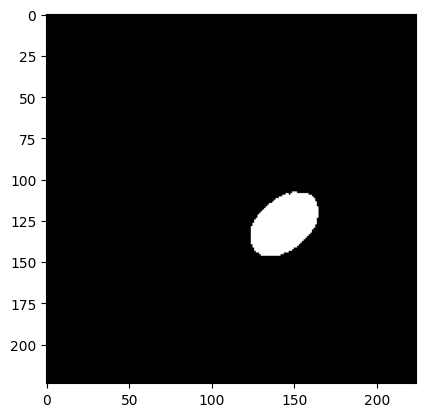

In [17]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

# 기존 모델

In [18]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(image_width, image_height, 3))

# 모델 구성
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [20]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# 모델 학습을 위한 설정
epochs = 120  # 여기서 원하는 에폭 수로 설정하세요.

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/120
6480/6480 [==============================] - 2986s 460ms/step - loss: 3.9185 - accuracy: 0.1105 - val_loss: 2.5701 - val_accuracy: 0.2591
Epoch 2/120
6480/6480 [==============================] - 1294s 200ms/step - loss: 1.6688 - accuracy: 0.4833 - val_loss: 556.4542 - val_accuracy: 0.0025
Epoch 3/120
6480/6480 [==============================] - 1348s 208ms/step - loss: 1.0316 - accuracy: 0.6606 - val_loss: 1.2096 - val_accuracy: 0.6489
Epoch 4/120
6480/6480 [==============================] - 1352s 209ms/step - loss: 0.7427 - accuracy: 0.7502 - val_loss: 2.4666 - val_accuracy: 0.5564
Epoch 5/120
6480/6480 [==============================] - 1375s 212ms/step - loss: 0.5966 - accuracy: 0.7967 - val_loss: 1.1805 - val_accuracy: 0.6132
Epoch 6/120
6480/6480 [==============================] - 1275s 197ms/step - loss: 0.4979 - accuracy: 0.8294 - val_loss: 414.7805 - val_accuracy: 0.0039
Epoch 7/120
6480/6480 [==============================] - 1274s 197ms/step - loss: 0.4269 - accur

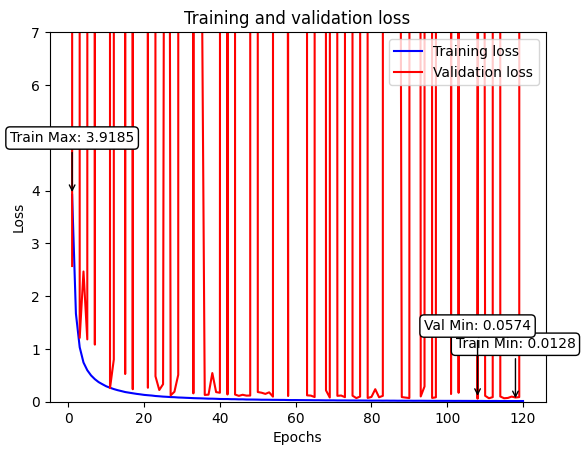

In [22]:
loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validation loss

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Add maximum and minimum values for training loss
max_loss = max(loss)
min_loss = min(loss)
max_loss_epoch = loss.index(max_loss) + 1
min_loss_epoch = loss.index(min_loss) + 1

plt.annotate(f'Train Max: {max_loss:.4f}', xy=(max_loss_epoch, max_loss), xytext=(max_loss_epoch, max_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_loss:.4f}', xy=(min_loss_epoch, min_loss), xytext=(min_loss_epoch, min_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation loss
max_val_loss = max(val_loss)
min_val_loss = min(val_loss)    
max_val_loss_epoch = val_loss.index(max_val_loss) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

plt.annotate(f'Val Max: {max_val_loss:.4f}', xy=(max_val_loss_epoch, max_val_loss), xytext=(max_val_loss_epoch+2, max_val_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch, min_val_loss+1.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.ylim(0, 7)  # Set the y-axis limits between 0 and 1

plt.show()



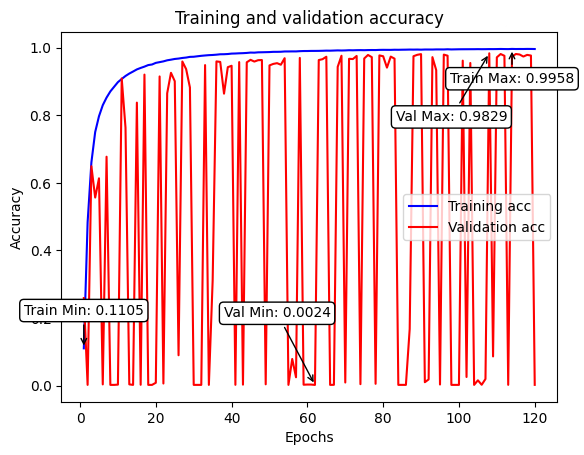

In [23]:
acc = history.history['accuracy'] # training accuracy
val_acc = history.history['val_accuracy'] # validation accuracy

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Add maximum and minimum values for training accuracy
max_acc = max(acc)
min_acc = min(acc)
max_acc_epoch = acc.index(max_acc) + 1
min_acc_epoch = acc.index(min_acc) + 1

plt.annotate(f'Train Max: {max_acc:.4f}', xy=(max_acc_epoch, max_acc), xytext=(max_acc_epoch, max_acc-0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_acc:.4f}', xy=(min_acc_epoch, min_acc), xytext=(min_acc_epoch, min_acc+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation accuracy
max_val_acc = max(val_acc)
min_val_acc = min(val_acc)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_acc_epoch = val_acc.index(min_val_acc) + 1

plt.annotate(f'Val Max: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch-10, max_val_acc-0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc), xytext=(min_val_acc_epoch-10, min_val_acc+0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.show()


In [3]:
# 모델 저장
# model.save('E:\Pill Project\model/AlexNet_10_31_data18_batch16_epoch30_m2.h5')

SAVED_MODEL_PATH = 'E:\Pill Project\model_h5/ResNet50_11_12_data400_batch64_epoch120_m1.h5'
export_path = os.path.join(SAVED_MODEL_PATH)

tf.keras.models.save_model(
  model,
  export_path,
  overwrite=True,
  include_optimizer=True,
  save_format=None,
  signatures=None,
  options=None
)
print('\nSaved model:')

NameError: name 'model' is not defined

: 

In [ ]:
# 저장된 모델 파일 로드
model = models.load_model('c:/Users/LEE/Desktop/app/assets/AlexNet_10_31_data18_batch16_epoch30_m1.tflite')

In [29]:
# 테스트셋 평가
results = model.evaluate(test_generator)
results

405/405 [==============================] - 105s 258ms/step - loss: 0.3269 - accuracy: 0.9201


[0.3269144296646118, 0.9200617074966431]

In [30]:
# 테스트셋 예측
results = model.predict(test_generator)
results


array([[0.0000000e+00, 6.7517599e-34, 0.0000000e+00, ..., 0.0000000e+00,
        5.4453811e-36, 6.4441246e-26],
       [4.7104237e-30, 2.4400703e-26, 3.8407118e-29, ..., 1.4998909e-21,
        1.2567253e-27, 1.2149968e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7676101e-31],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.4061440e-34, 0.0000000e+00, ..., 0.0000000e+00,
        1.3848214e-26, 2.4400465e-38],
       [2.7035816e-23, 1.8130349e-10, 1.7338660e-20, ..., 9.5538569e-30,
        6.7365394e-28, 1.1803977e-27]], dtype=float32)

In [31]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results

array([386, 280, 194, ...,  98, 102, 117], dtype=int64)

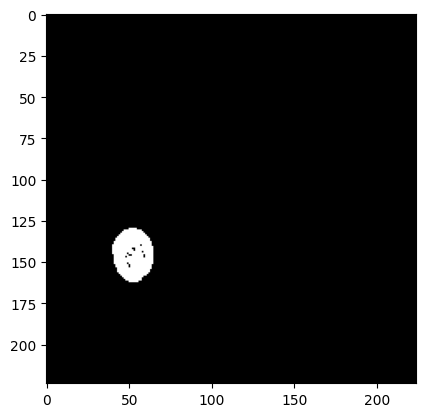

In [32]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [33]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]


NameError: name 'labels_list' is not defined